In [31]:
import numpy as np
import time as t
import matplotlib.pyplot as plt
# Jacobi Method
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations



In [47]:
c1 = 1e-3
c2 = 1e-6
c3 = 1e-9
A = np.array([[3, -0.1, -0.2], 
[0.1, 7, -0.3],
[0.3, -0.2, 10]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros_like(b)

mi = 1000

jminus3, iterations1 = jacobi(A, b, x0, c1, mi)
gminus3, iterations2 = gauss_seidel(A, b, x0, c1, mi)

print(f"Jacobi method Iterations for 10^-3: {iterations1}")
print(f"Gauss-Seidel method Iterations for 10^-3: {iterations2}")

jminus6, iterations3 = jacobi(A, b, x0, c2, mi)
gminus6, iterations4 = gauss_seidel(A, b, x0, c2, mi)

print(f"Jacobi method Iterations for 10^-6: {iterations3}")
print(f"Gauss-Seidel method Iterations for 10^-6: {iterations4}")

jminus9, iterations5 = jacobi(A, b, x0, c3, mi)
gminus9, iterations6 = gauss_seidel(A, b, x0, c3, mi)

print(f"Jacobi method Iterations for 10^-9: {iterations5}")
print(f"Gauss-Seidel method Iterations for 10^-9: {iterations6}")

true_sol = np.linalg.solve(A, b)

Jacobi method Iterations for 10^-3: 3
Gauss-Seidel method Iterations for 10^-3: 3
Jacobi method Iterations for 10^-6: 6
Gauss-Seidel method Iterations for 10^-6: 4
Jacobi method Iterations for 10^-9: 8
Gauss-Seidel method Iterations for 10^-9: 6


Text(0.5, 1.0, 'Error vs Tolerance in Methods in Jacobi Method')

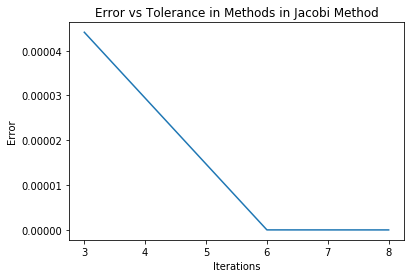

In [52]:
error1 = np.abs(true_sol[0] - jminus3[0])
error2 = np.abs(true_sol[1] - jminus3[1])
error3 = np.abs(true_sol[2] - jminus3[2])
terror1 = error1 + error2 + error3

error1 = np.abs(true_sol[0] - jminus6[0])
error2 = np.abs(true_sol[1] - jminus6[1])
error3 = np.abs(true_sol[2] - jminus6[2])
terror2 = error1 + error2 + error3

error1 = np.abs(true_sol[0] - jminus9[0])
error2 = np.abs(true_sol[1] - jminus9[1])
error3 = np.abs(true_sol[2] - jminus9[2])
terror3 = error1 + error2 + error3

error = [terror1, terror2, terror3]
iterations = [3, 6, 8]

plt.plot(iterations, error)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error vs Tolerance in Methods in Jacobi Method")

Text(0.5, 1.0, 'Error vs Tolerance in Methods in Gauss-Seidel Method')

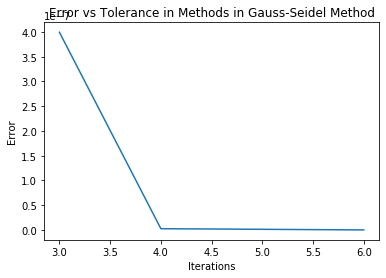

In [56]:
error1 = np.abs(true_sol[0] - gminus3[0])
error2 = np.abs(true_sol[1] - gminus3[1])
error3 = np.abs(true_sol[2] - gminus3[2])
terror1 = error1 + error2 + error3

error1 = np.abs(true_sol[0] - gminus6[0])
error2 = np.abs(true_sol[1] - gminus6[1])
error3 = np.abs(true_sol[2] - gminus6[2])
terror2 = error1 + error2 + error3

error1 = np.abs(true_sol[0] - gminus9[0])
error2 = np.abs(true_sol[1] - gminus9[1])
error3 = np.abs(true_sol[2] - gminus9[2])
terror3 = error1 + error2 + error3

error = [terror1, terror2, terror3]
iterations = [3, 4, 6]

plt.plot(iterations, error)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error vs Tolerance in Methods in Gauss-Seidel Method")

It appears as if for moth bethods, the more iterations you have, the smaller the rror it gets. If you decrease the tolerance for error, the number of iterations increases, and the values become more accurate